In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer, LabelEncoder,StandardScaler
from scipy import stats
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
print('a')

In [76]:
pd.set_option('display.max_columns',None)
pd.reset_option('display.max_rows',10)

In [77]:
df = pd.read_csv('/kaggle/input/visa-dataset/Visa_Predection_Dataset.csv')
df = df.drop(columns = ['case_id'])

In [78]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# EDA

In [79]:
df.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)

In [82]:
df.shape

(25480, 11)

##NO DUPLICATES OR EMPTY ROWS##

In [22]:
df.dtypes

continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [110]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [83]:
cols = df.select_dtypes(include='object').columns.tolist()
nums = df.select_dtypes(exclude='object').columns.tolist()
print(f'{cols} \n {nums}')

['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] 
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [9]:
for col in cols:
    types = df[col].nunique()
    count = df[col].value_counts()
    print(f'{types},{count}')

6,continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
4,education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
2,has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
2,requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
5,region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
4,unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
2,full_time_position
Y    22773
N     2707
Name: count, dtype: int64
2,case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


#  Data Visualisation

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.countplot(data = df, x= 'continent', ax = axs[0,0])
axs[0,0].set_title('plot for continent')
axs[0,0].tick_params(axis='x', rotation=45)


sns.countplot(data = df, x= 'education_of_employee', ax = axs[0,1])
axs[0,1].set_title('plot for education_of_employee')
axs[0,1].tick_params(axis='x', rotation=45)

sns.countplot(data = df, x= 'has_job_experience', ax = axs[0,2])
axs[0,2].set_title('plot for has_job_experience')
axs[0,2].tick_params(axis='x', rotation=45)

sns.countplot(data = df, x= 'requires_job_training', ax = axs[1,0])
axs[1,0].set_title('plot for requires_job_training')
axs[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data = df, x= 'region_of_employment', ax = axs[1,1])
axs[1,1].set_title('plot for region_of_employment')
axs[1,1].tick_params(axis='x', rotation=45)

sns.countplot(data = df, x= 'unit_of_wage', ax = axs[1,2])
axs[1,2].set_title('plot for unit_of_wage')
axs[1,2].tick_params(axis='x', rotation=45)

sns.countplot(data = df, x= 'full_time_position', ax = axs[2,0])
axs[2,0].set_title('plot for full_time_position')
axs[2,0].tick_params(axis='x', rotation=45)

sns.countplot(data = df, x= 'case_status', ax = axs[2,1])
axs[2,1].set_title('plot for case_status')
axs[2,1].tick_params(axis='x', rotation=45)


plt.subplots_adjust(hspace=1)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


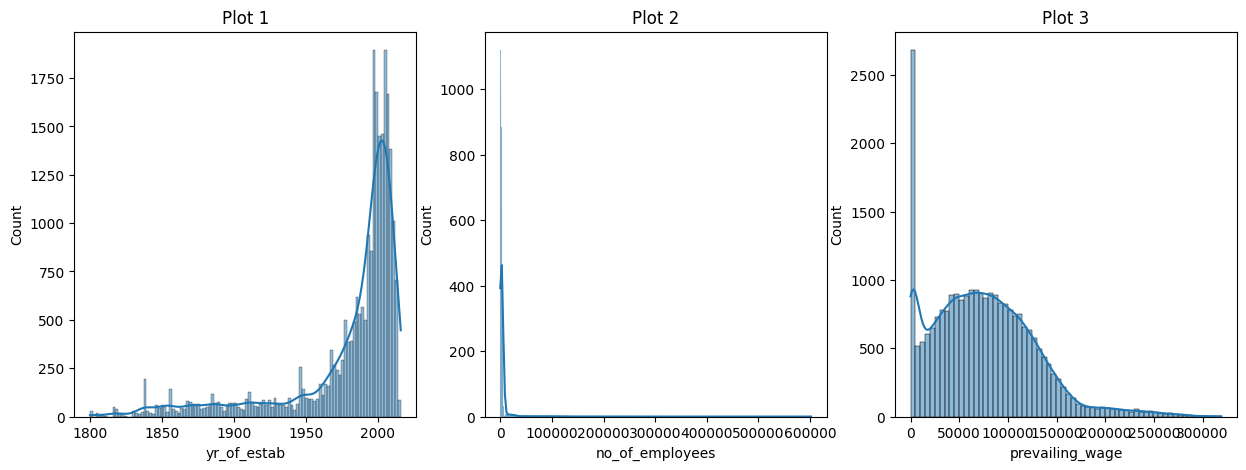

In [114]:
fig, axes = plt.subplots(1,3 , figsize=(15,5))

sns.histplot(data = df,x = 'yr_of_estab',ax=axes[0],kde=True)
axes[0].set_title('Plot 1')

sns.histplot(data = df,x = 'no_of_employees',ax=axes[1],kde=True)
axes[1].set_title('Plot 2')

sns.histplot(data = df,x = 'prevailing_wage',ax=axes[2],kde=True)
axes[2].set_title('Plot 3')

plt.show()

<Axes: >

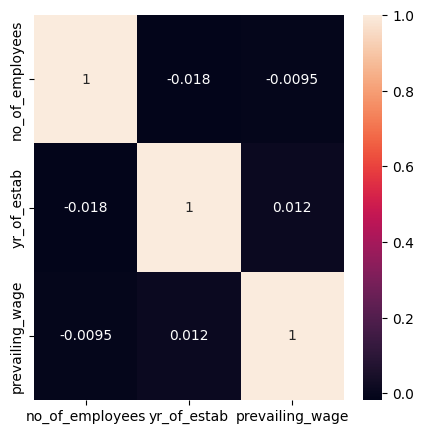

In [123]:
corr = df[nums].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True)

# Visualisation Done, Now we proceed to Data transformation

Let's Skip Outliers for Now

In [84]:
##We need to remove deal with outliers before splitting

def remove_outliers(df,cols):
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    
    IQR = q3 - q1
    
    upper_bound = q3 + 1.5*IQR
    lower_bound = q1 - 1.5*IQR    
    
    df_filtered = df[(df[cols] >= lower_bound) & (df[cols] <= upper_bound)]
    
    return df_filtered

In [85]:
df_1 = remove_outliers(df,'prevailing_wage')
df_2 = remove_outliers(df_1,'prevailing_wage')
df = remove_outliers(df_2,'no_of_employees')

In [86]:
X = df.drop(columns = ['case_status'])
y = df['case_status']

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [97]:
# Loop through each column and map 'Y' to 1 and 'N' to 0
abca = ['has_job_experience','requires_job_training','full_time_position']
for col in abca:
    X_train[col] = X_train[col].map({'Y': 1, 'N': 0})
    X_test[col] = X_test[col].map({'Y': 1, 'N': 0})

In [98]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [104]:
X_train.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,Asia,Master's,0,0,1927,2007,South,66672.0300,Year,1
1,Asia,Master's,1,0,3802,1989,Northeast,71914.2700,Year,0
2,Asia,Bachelor's,1,0,2624,2013,Northeast,29350.9400,Year,1
3,Asia,Master's,0,0,1501,1983,Midwest,120371.7200,Year,1
4,North America,Bachelor's,1,0,997,1920,West,231.7069,Hour,1


In [102]:
X_train = X_train.drop(columns = ['index'],axis=1)
X_test = X_test.drop(columns = ['index'],axis=1)

In [105]:

impute = SimpleImputer(strategy='most_frequent')
X_train[['continent','education_of_employee','region_of_employment','unit_of_wage']] = impute.fit_transform(X_train[['continent','education_of_employee','region_of_employment','unit_of_wage']])
X_test[['continent','education_of_employee','region_of_employment','unit_of_wage']] = impute.transform(X_test[['continent','education_of_employee','region_of_employment','unit_of_wage']])

In [106]:
##Encoding multiple categorical features

encoding = OneHotEncoder()

#Train data

encoded_columns = encoding.fit_transform(X_train[['continent','education_of_employee','region_of_employment','unit_of_wage']]).toarray()
encoded_df = pd.DataFrame(encoded_columns, columns=encoding.get_feature_names_out(['continent','education_of_employee','region_of_employment','unit_of_wage']))

#Test data

encoded_columns_2 = encoding.fit_transform(X_test[['continent','education_of_employee','region_of_employment','unit_of_wage']]).toarray()
encoded_df_2 = pd.DataFrame(encoded_columns_2, columns=encoding.get_feature_names_out(['continent','education_of_employee','region_of_employment','unit_of_wage']))

In [107]:
X_train = pd.concat([X_train.drop(columns = ['continent','education_of_employee','region_of_employment','unit_of_wage'],axis =1),encoded_df],axis=1)

X_test = pd.concat([X_test.drop(columns = ['continent','education_of_employee','region_of_employment','unit_of_wage'],axis =1),encoded_df_2],axis=1)

In [108]:
X_train.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,1927,2007,66672.0300,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0,3802,1989,71914.2700,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2624,2013,29350.9400,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,1501,1983,120371.7200,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,997,1920,231.7069,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


Text(0.5, 1.0, 'yr_of_estab plot')

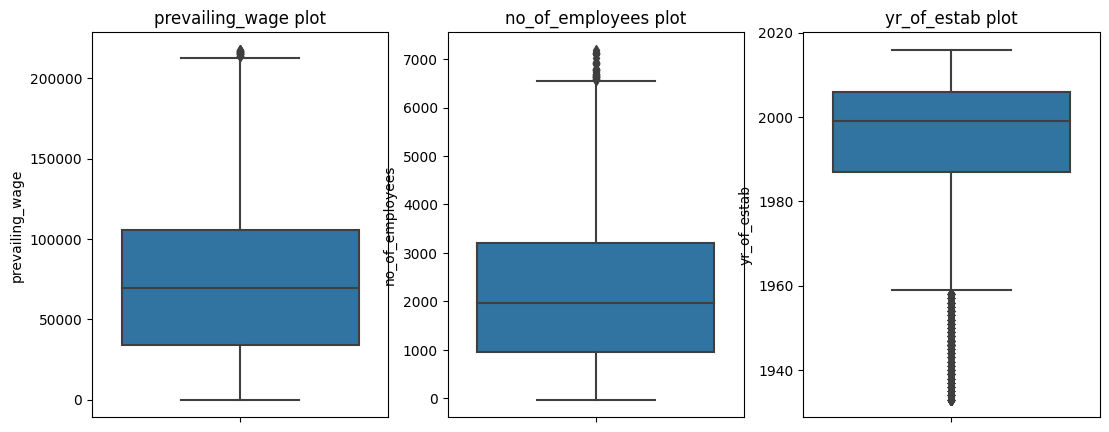

In [85]:
fig, axes = plt.subplots(1,3,figsize=(13,5))

sns.boxplot(data = X_train,y ='prevailing_wage',ax = axes[0])
axes[0].set_title('prevailing_wage plot')

sns.boxplot(data = X_train,y ='no_of_employees',ax = axes[1])  
axes[1].set_title('no_of_employees plot')

sns.boxplot(data = X_train,y ='yr_of_estab',ax = axes[2])
axes[2].set_title('yr_of_estab plot')

# Data preprocessing is done. We can Normalize data, but some models do not require that

In [ ]:
## To noramlize data 
#qt = QuantileTransformer(output_distribution='normal')
#df['yr_of_estab_quantile'] = qt.fit_transform(df[['yr_of_estab']])

#qt1 = QuantileTransformer(output_distribution='normal')
#df['no_of_employees_quantile']  = qt2.fit_transform(df[['no_of_employees']])

#qt2 = QuantileTransformer(output_distribution='normal')
#df['prevailing_wage_quantile']  = qt2.fit_transform(df[['prevailing_wage']])

Now we can train The Model

In [109]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [110]:
#encoder.classes_
#encoder.transform(encoder.classes_)

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


{'Certified': 0, 'Denied': 1}


# 'Certified': 0, 'Denied': 1

In [69]:
X_train.head()

,index,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,23135,0,0,1927,2007,66672.0300,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,8821,1,0,3802,1989,71914.2700,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5770,1,0,2624,2013,29350.9400,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,345,0,0,1501,1983,120371.7200,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22496,1,0,997,1920,231.7069,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [24]:
X_train.columns

Index(['index', 'has_job_experience', 'requires_job_training',
       'no_of_employees', 'yr_of_estab', 'prevailing_wage',
       'full_time_position', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'education_of_employee_Bachelor's',
       'education_of_employee_Doctorate', 'education_of_employee_High School',
       'education_of_employee_Master's', 'region_of_employment_Island',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West',
       'unit_of_wage_Hour', 'unit_of_wage_Month', 'unit_of_wage_Week',
       'unit_of_wage_Year'],
      dtype='object')

In [111]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'XGBoostClassifier': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Gaussian Naive Bayes': GaussianNB()
}


In [44]:
def evaluate_classification_models(X_train, X_test, y_train, y_test, models):
    # Initialize a list to store results
    results = []

    # Evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions
        X_pred_training = model.predict(X_train)
        accuracy_train = accuracy_score(y_train, X_pred_training)
        accuracy_test = accuracy_score(y_test, y_pred)  # Calculate accuracy
        f1_train = f1_score(y_train, X_pred_training, average='weighted')
        f1_test = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score
        results.append({
            'Model': model_name,
            'Accuracy of training data': accuracy_train,
            'Accuracy of testing data': accuracy_test,
            'F1 Score of training data': f1_train,
            'F1 Score of testing data': f1_test,
            })

    # Create a DataFrame to summarize results
    results_df = pd.DataFrame(results)
    return results_df

In [45]:
results_df = evaluate_classification_models(X_train, X_test, y_train, y_test, models)
print(results_df)

                       Model  Accuracy of training data  \
0        Logistic Regression                   0.738658   
1          XGBoostClassifier                   0.896219   
2              Random Forest                   1.000000   
3  Support Vector Classifier                   0.779286   
4       Gaussian Naive Bayes                   0.715229   

   Accuracy of testing data  F1 Score of training data  \
0                  0.737010                   0.724943   
1                  0.800043                   0.892524   
2                  0.800043                   1.000000   
3                  0.772359                   0.765519   
4                  0.718484                   0.702623   

   F1 Score of testing data  
0                  0.722389  
1                  0.790744  
2                  0.791302  
3                  0.758209  
4                  0.705983  


# ##Let's train XGB, SVC, Random Forest . The 3 best algorithms


In [ ]:
models = {
    'XGBoostClassifier': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    }

In [48]:

models = {
    'XGBoostClassifier': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
}
params = {
"Support Vector Classifier" :{
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'degree': [2, 3, 4],
    'class_weight': ['balanced', None]
},

'XGBoostClassifier' : {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 0.1, 0]
},

'Random Forest': {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}
    }


In [62]:
def evaluate_classification_models(X_train, X_test, y_train, y_test, models, param_grids,n_iter=2):
    # Initialize a list to store results
    results = []

    # Evaluate each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # Define the GridSearchCV object
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[model_name],verbose=1, cv=2, scoring='accuracy')

        # Fit the model using GridSearchCV
        random_search.fit(X_train, y_train)

        # Get the best estimator (model) from grid search
        best_model = random_search.best_estimator_

        # Make predictions on the test set
        y_pred_test = best_model.predict(X_test)
        y_pred_train = best_model.predict(X_train)

        # Calculate performance metrics
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        f1_train = f1_score(y_train, y_pred_train, average='weighted')
        f1_test = f1_score(y_test, y_pred_test, average='weighted')

        # Append results to the list
        results.append({
            'Model': model_name,
            'Best Parameters': random_search.best_params_,
            'Accuracy of training data': accuracy_train,
            'Accuracy of testing data': accuracy_test,
            'F1 Score of training data': f1_train,
            'F1 Score of testing data': f1_test
        })

    # Create a DataFrame to summarize results
    results_df = pd.DataFrame(results)
    return results_df

In [156]:
results_df = evaluate_classification_models(X_train, X_test, y_train, y_test, models, params)
print(results_df)

NameError: name 'evaluate_classification_models' is not defined

In [155]:
best_params_df = results_df['Best Parameters'].to_list()

# Print the DataFrame containing only the model names and their best parameters
print(best_params_df)

NameError: name 'results_df' is not defined

In [ ]:
# Upon Further inspection, SVC stood out compared to rest.


In [ ]:
best_params = {'subsample': [0.8],
          'reg_lambda': [1],
          'reg_alpha': [0],
          'n_estimators':[200],
          'max_depth': [7],
          'learning_rate': [0.01],
          'gamma': [5],
          'colsample_bytree': [0.6]
}

In [157]:
params = {'subsample': [0.8],
          'reg_lambda': [1],
          'reg_alpha': [0],
          'n_estimators':[200],
          'max_depth': [7],
          'learning_rate': [0.01],
          'gamma': [5],
          'colsample_bytree': [0.6]
}

xgb = XGBClassifier()
grid =GridSearchCV(estimator=xgb, param_grid = params, verbose =1 ,n_jobs = -1, scoring='recall',cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'colsample_bytree': 0.6, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


In [158]:
y_pred = grid.predict(X_test)
y_pred_train = grid.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred))
print(f'traning {classification_report(y_train,y_pred_train)}')
print(f'test{classification_report(y_test,y_pred)}')


0.7528221512247071
0.7525553662691652
traning               precision    recall  f1-score   support

           0       0.77      0.89      0.83     12506
           1       0.69      0.47      0.56      6274

    accuracy                           0.75     18780
   macro avg       0.73      0.68      0.69     18780
weighted avg       0.74      0.75      0.74     18780

test              precision    recall  f1-score   support

           0       0.77      0.89      0.83      3110
           1       0.69      0.48      0.57      1586

    accuracy                           0.75      4696
   macro avg       0.73      0.69      0.70      4696
weighted avg       0.74      0.75      0.74      4696



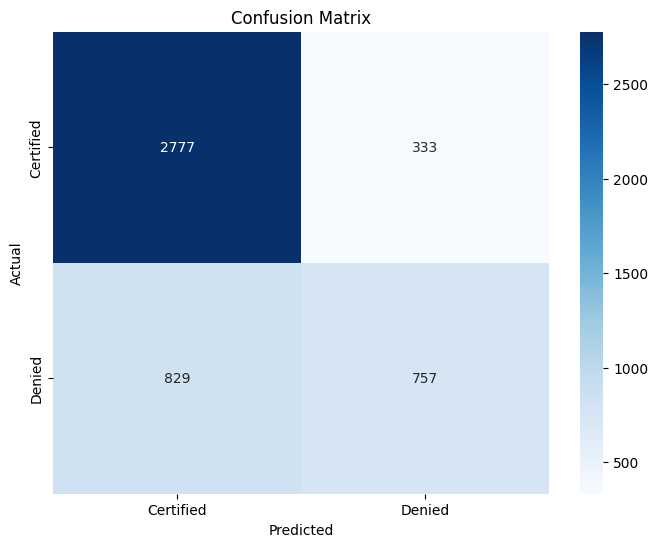

In [152]:


# Assuming y_test contains your true labels and y_pred contains your model's predictions
# y_test = ... (your true labels)
# y_pred = ... (your model predictions)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Certified', 'Denied'], columns=['Certified', 'Denied'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [159]:
## Let's train a tensorflow model on it.

In [197]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, regularizers

# Import common layers
from tensorflow.keras.layers import Dense, Dropout

# Import common model evaluation tools
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [161]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [162]:
X_train.shape[1]

25

In [202]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
#    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [203]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

In [204]:
model.compile(optimizer='adam',metrics=['recall'],loss='binary_crossentropy')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [206]:
class_weights = {0: 1, 1: 2}

model.fit(X_train,y_train,epochs=100,validation_data=[X_test,y_test],verbose=1,class_weight=class_weights,batch_size=32,callbacks=[early_stopping],)

Epoch 1/100
587/587 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7489 - recall: 0.7000 - val_loss: 0.5549 - val_recall: 0.7068
Epoch 2/100
587/587 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7459 - recall: 0.7105 - val_loss: 0.5429 - val_recall: 0.6961
Epoch 3/100
587/587 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7414 - recall: 0.6917 - val_loss: 0.5474 - val_recall: 0.7068


In [184]:
model['loss']

TypeError: 'Sequential' object is not subscriptable

In [175]:
f1_score(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets